In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime
import koreanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [34]:
powercomp = pd.read_csv('./data/powercomp.csv')
proc = pd.read_csv('./data/proc_data.csv', index_col=0)

In [35]:
powercomp.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [36]:
proc.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Date_proc
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01 00:00:00
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01 00:10:00
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01 00:20:00
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01 00:30:00
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01 00:40:00


# 데이터 EDA & 전처리

In [37]:
powercomp.shape

(52416, 9)

In [38]:
powercomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [39]:
# 결측치는 없다.
powercomp.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [40]:
powercomp.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [41]:
# Zone별 발전량 평균
powercomp['Zone 1 Power Consumption'].mean(), powercomp['Zone 2  Power Consumption'].mean(), powercomp['Zone 3  Power Consumption'].mean()

(32344.970563586106, 21042.509082321845, 17835.406218376575)

In [42]:
powercomp.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [43]:
powercomp['DateTime'] = pd.to_datetime(powercomp['DateTime'])
powercomp.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [44]:
powercomp['DateTime'].min(), powercomp['DateTime'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

### Zone별 전력 발전량

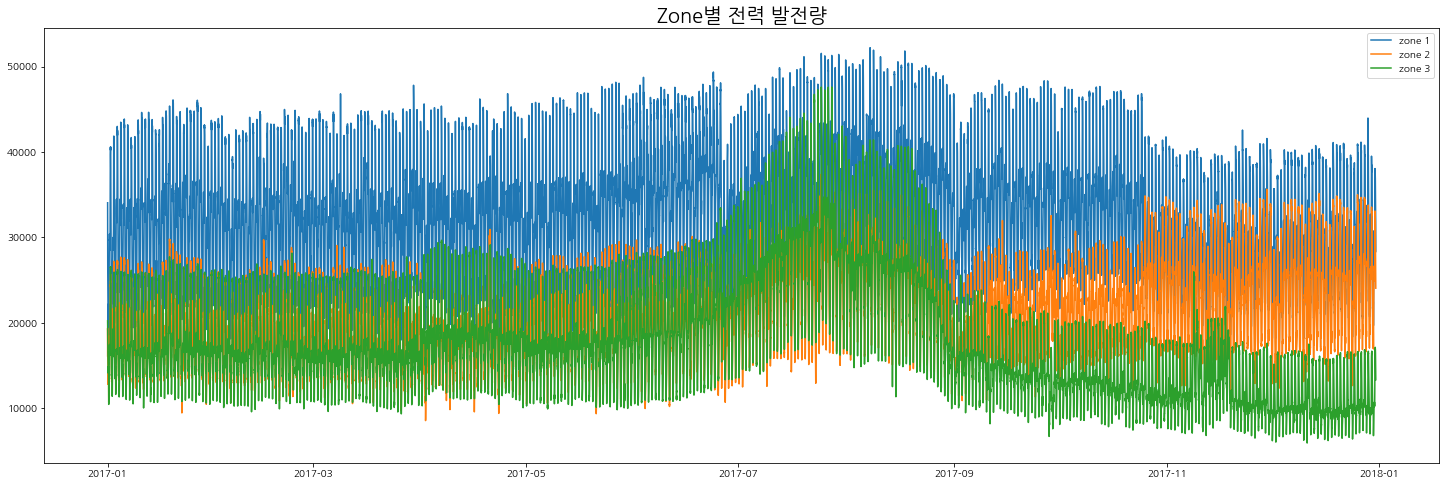

In [45]:
plt.figure(figsize=(25, 8))
plt.plot(powercomp['DateTime'], powercomp['Zone 1 Power Consumption'], label='zone 1')
plt.plot(powercomp['DateTime'], powercomp['Zone 2  Power Consumption'], label='zone 2')
plt.plot(powercomp['DateTime'], powercomp['Zone 3  Power Consumption'], label='zone 3')
plt.legend()
plt.title('Zone별 전력 발전량', fontsize=20)
plt.show()

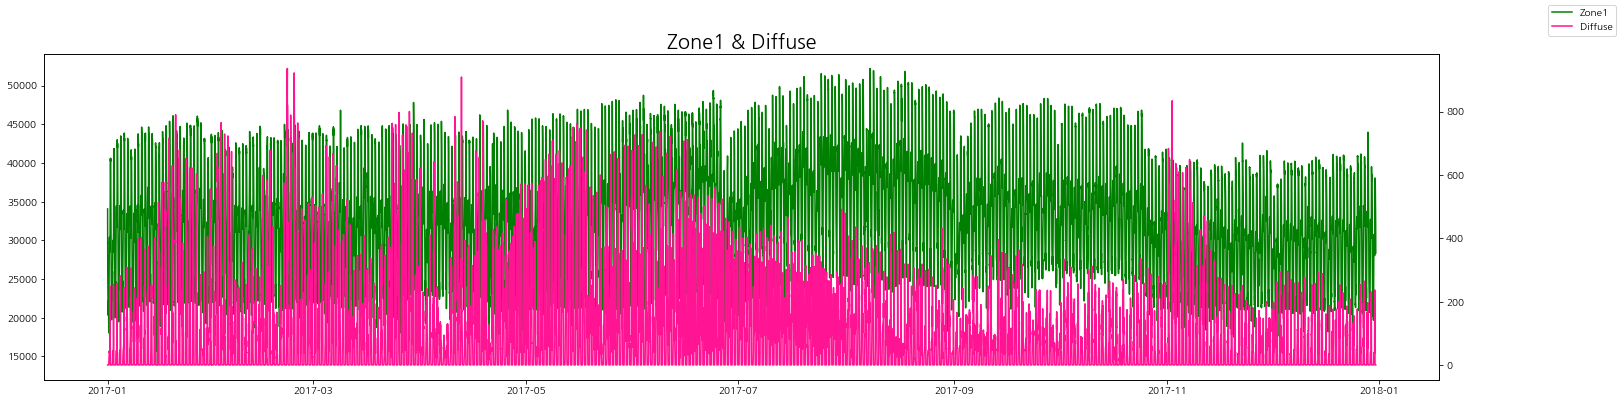

In [46]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 1 Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['diffuse flows'], color='deeppink', label='Diffuse')

fig.legend()
plt.title('Zone1 & Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

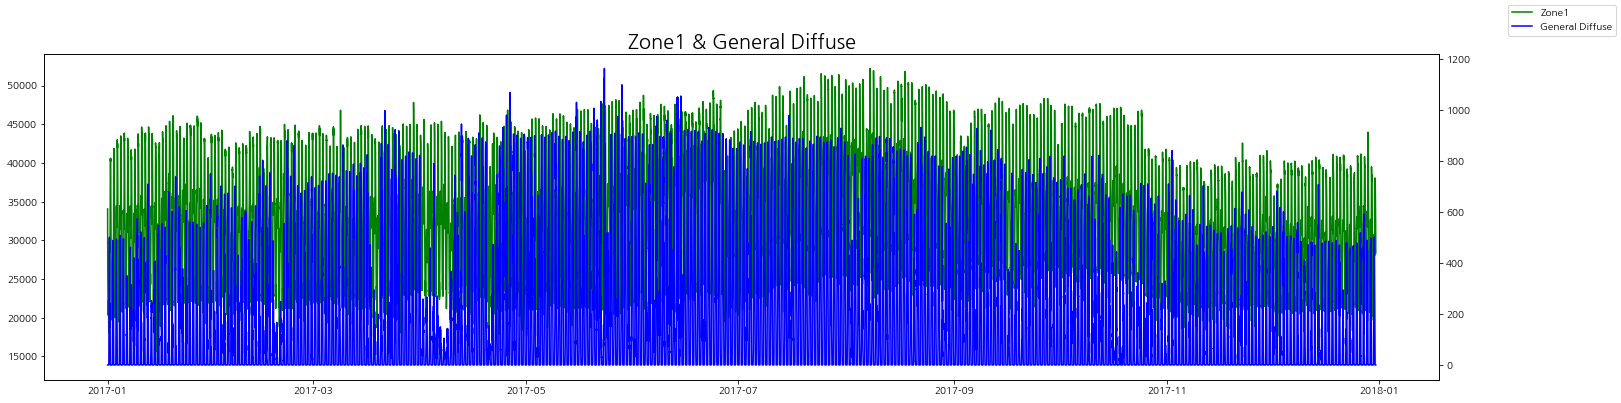

In [47]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 1 Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['general diffuse flows'], color='blue', label='General Diffuse')

fig.legend()
plt.title('Zone1 & General Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

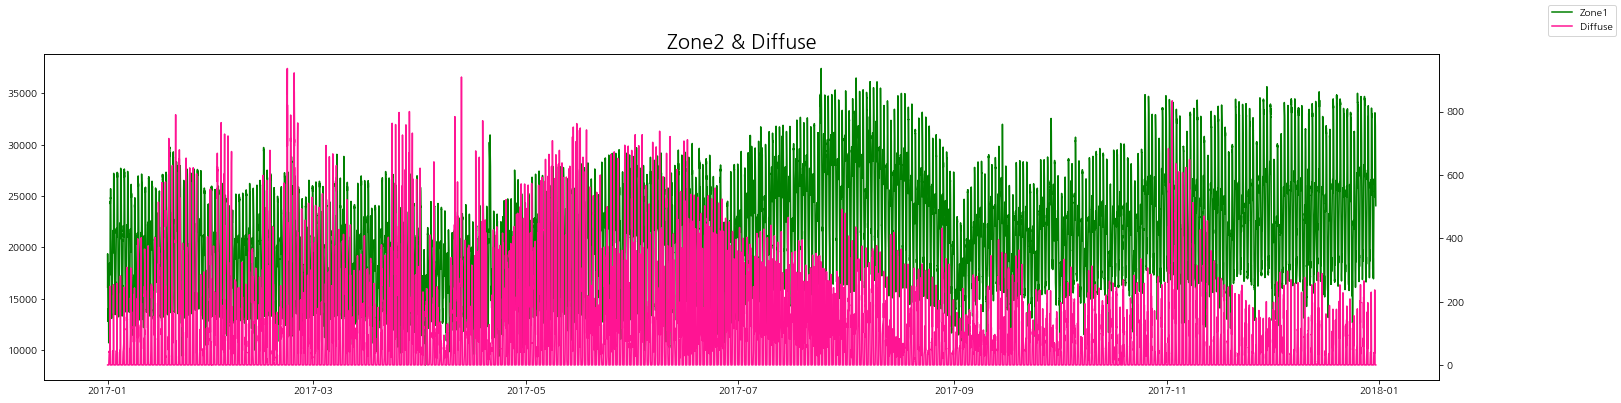

In [48]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 2  Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['diffuse flows'], color='deeppink', label='Diffuse')

fig.legend()
plt.title('Zone2 & Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

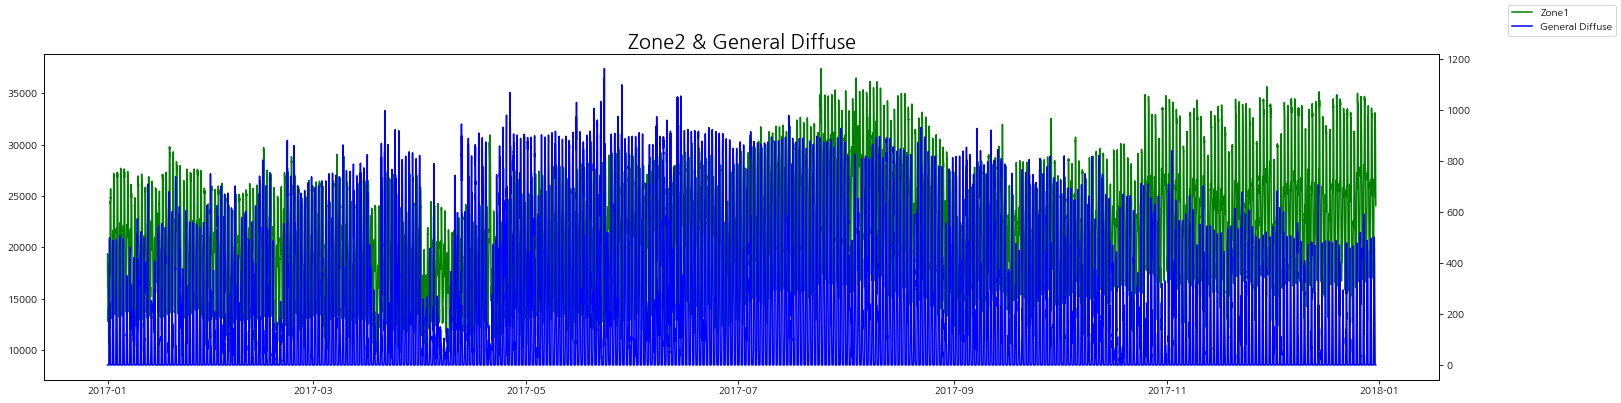

In [49]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 2  Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['general diffuse flows'], color='blue', label='General Diffuse')

fig.legend()
plt.title('Zone2 & General Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

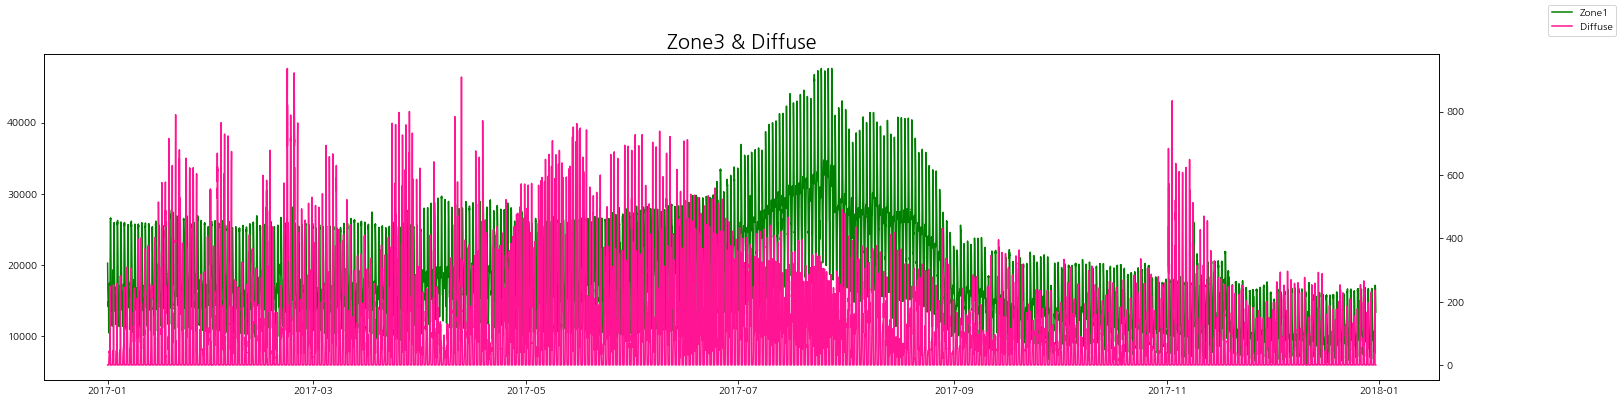

In [50]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 3  Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['diffuse flows'], color='deeppink', label='Diffuse')

fig.legend()
plt.title('Zone3 & Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

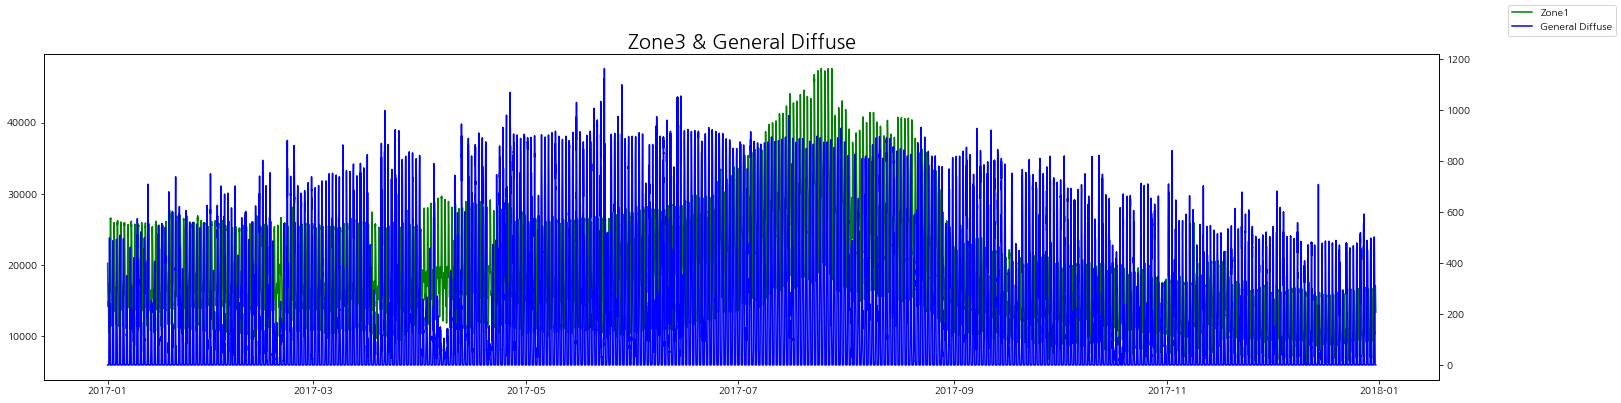

In [51]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['Zone 3  Power Consumption'], color='green', label='Zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['general diffuse flows'], color='blue', label='General Diffuse')

fig.legend()
plt.title('Zone3 & General Diffuse', fontsize=20)
plt.gcf().set_size_inches(25, 6)
plt.show()

### 날짜별 Zone 전력 발전량

In [52]:
powercomp['month'] = powercomp['DateTime'].dt.month
powercomp.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


In [53]:
powercomp.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'month'],
      dtype='object')

In [55]:
# 데이터 컬럼명 변경
powercomp.columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3', 'month']

# 데이터 컬럼 순서 변경
powercomp = powercomp[['DateTime',  'month', 'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3']]

powercomp.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


- 월별

In [58]:
# zone1
powercomp.groupby('month')['zone1'].mean().sort_values(ascending=False)

month
8     36435.189574
7     35831.553603
6     34605.540839
9     33396.681416
10    32827.660055
5     32396.009166
4     31169.768210
3     31155.165408
1     31032.493535
2     30985.753632
12    29024.168427
11    29002.106838
Name: zone1, dtype: float64

In [59]:
# zone2
powercomp.groupby('month')['zone2'].mean().sort_values(ascending=False)

month
8     24656.216575
7     24147.886893
12    23681.852818
11    23240.464015
10    21468.993441
6     20670.928621
9     20180.432259
5     19977.287859
1     19394.444717
2     18787.793096
3     18457.937484
4     17633.966395
Name: zone2, dtype: float64

In [60]:
# zone3
powercomp.groupby('month')['zone3'].mean().sort_values(ascending=False)

month
7     28194.111216
8     24648.894732
6     20430.941538
4     18593.167677
1     17746.095349
5     17621.100953
2     17335.002154
3     16947.686004
9     14922.798774
10    13264.095173
11    12862.496653
12    11044.805922
Name: zone3, dtype: float64

- 일별 시간대

In [61]:
powercomp['hour'] = powercomp['DateTime'].dt.hour

In [62]:
# zone1
powercomp.groupby('hour')['zone1'].mean().sort_values(ascending=False)[:10]

hour
20    43822.590575
19    42795.919144
21    42216.478542
22    39068.635850
18    38846.130578
13    35112.272501
12    35052.519771
17    34924.975330
14    34643.598565
11    34487.628942
Name: zone1, dtype: float64

In [63]:
# zone2
powercomp.groupby('hour')['zone2'].mean().sort_values(ascending=False)[:10]

hour
20    28186.910385
19    27723.744582
21    27228.712785
18    25443.902236
22    25284.942543
17    23032.424137
13    22958.487220
12    22876.880705
14    22855.352630
15    22508.399601
Name: zone2, dtype: float64

In [64]:
# zone3
powercomp.groupby('hour')['zone3'].mean().sort_values(ascending=False)[:10]

hour
20    26027.609150
21    25186.686692
19    25125.471392
22    23529.045275
18    21850.768343
23    21032.497187
17    18832.994506
0     18657.222811
13    17890.132930
14    17659.932700
Name: zone3, dtype: float64

- 발전량이 가장 많은 여름철 8월의 시간대별 발전량

In [65]:
zone8_1 = powercomp[powercomp['DateTime'].astype(str).str.contains('2017-08-01')]

In [66]:
zone8_1

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
30528,2017-08-01 00:00:00,8,24.82,77.2,4.903,0.099,0.082,38517.20311,26979.09187,31008.90282,0
30529,2017-08-01 00:10:00,8,24.72,77.7,4.906,0.059,0.141,37973.80688,26416.47307,30713.98119,0
30530,2017-08-01 00:20:00,8,24.64,77.7,4.904,0.062,0.156,37308.94562,26192.18585,30178.30721,0
30531,2017-08-01 00:30:00,8,24.62,77.6,4.904,0.062,0.130,36164.61709,25599.15523,29666.70846,0
30532,2017-08-01 00:40:00,8,24.59,77.7,4.907,0.073,0.144,35678.75694,25344.45618,29413.91850,0
...,...,...,...,...,...,...,...,...,...,...,...
30667,2017-08-01 23:10:00,8,26.26,83.8,4.907,0.069,0.130,40972.07547,28849.41922,32838.62069,23
30668,2017-08-01 23:20:00,8,26.17,84.2,4.912,0.062,0.115,40422.28635,28431.25660,32555.73668,23
30669,2017-08-01 23:30:00,8,26.14,84.5,4.914,0.088,0.144,39591.20977,27815.41711,31857.55486,23
30670,2017-08-01 23:40:00,8,26.18,84.5,4.914,0.084,0.130,38670.63263,27484.68849,31189.46708,23


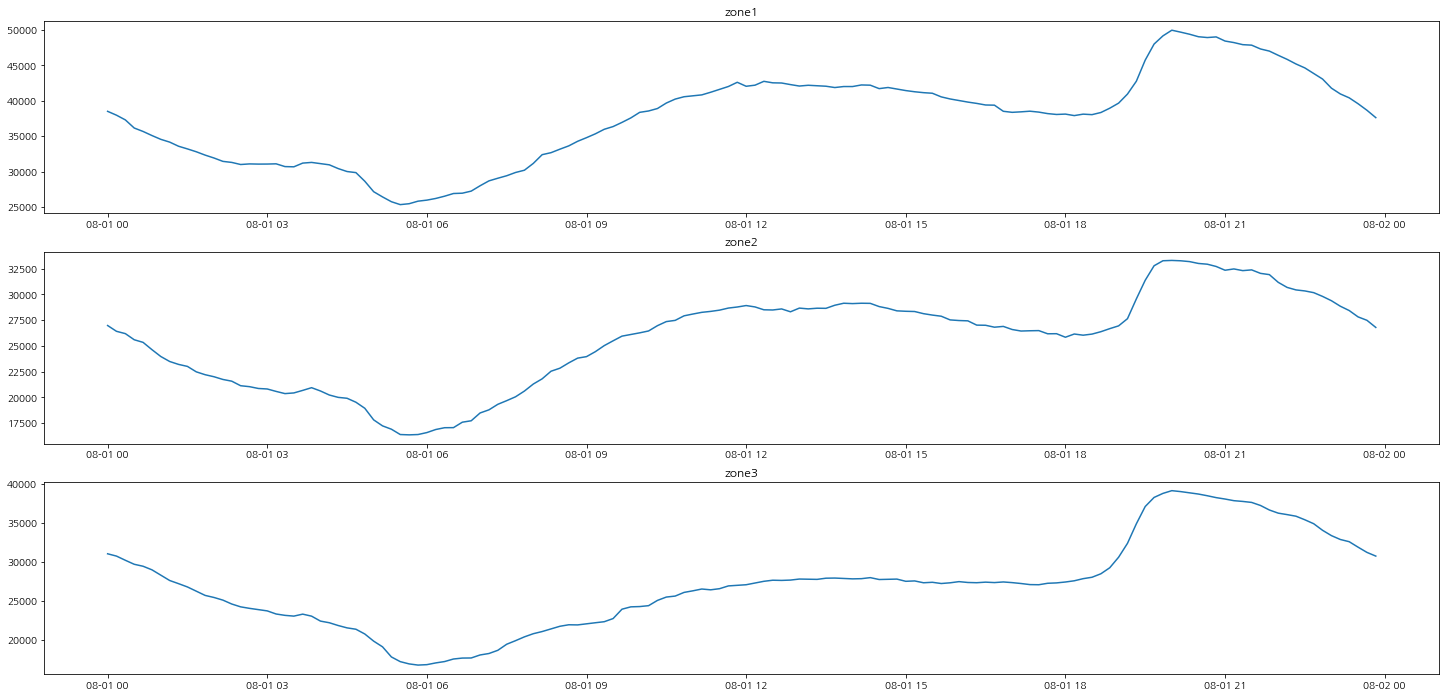

In [69]:
plt.figure(figsize=(25, 12))

plt.subplot(311)
plt.title('zone1')
plt.plot(zone8_1['DateTime'], zone8_1['zone1'], label='zone1')

plt.subplot(312)
plt.title('zone2')
plt.plot(zone8_1['DateTime'], zone8_1['zone2'], label='zone2')

plt.subplot(313)
plt.title('zone3')
plt.plot(zone8_1['DateTime'], zone8_1['zone3'], label='zone3')

plt.show()

- 겨울철에는?

In [70]:
zone1_1 = powercomp[powercomp['DateTime'].astype(str).str.contains('2017-01-01')]

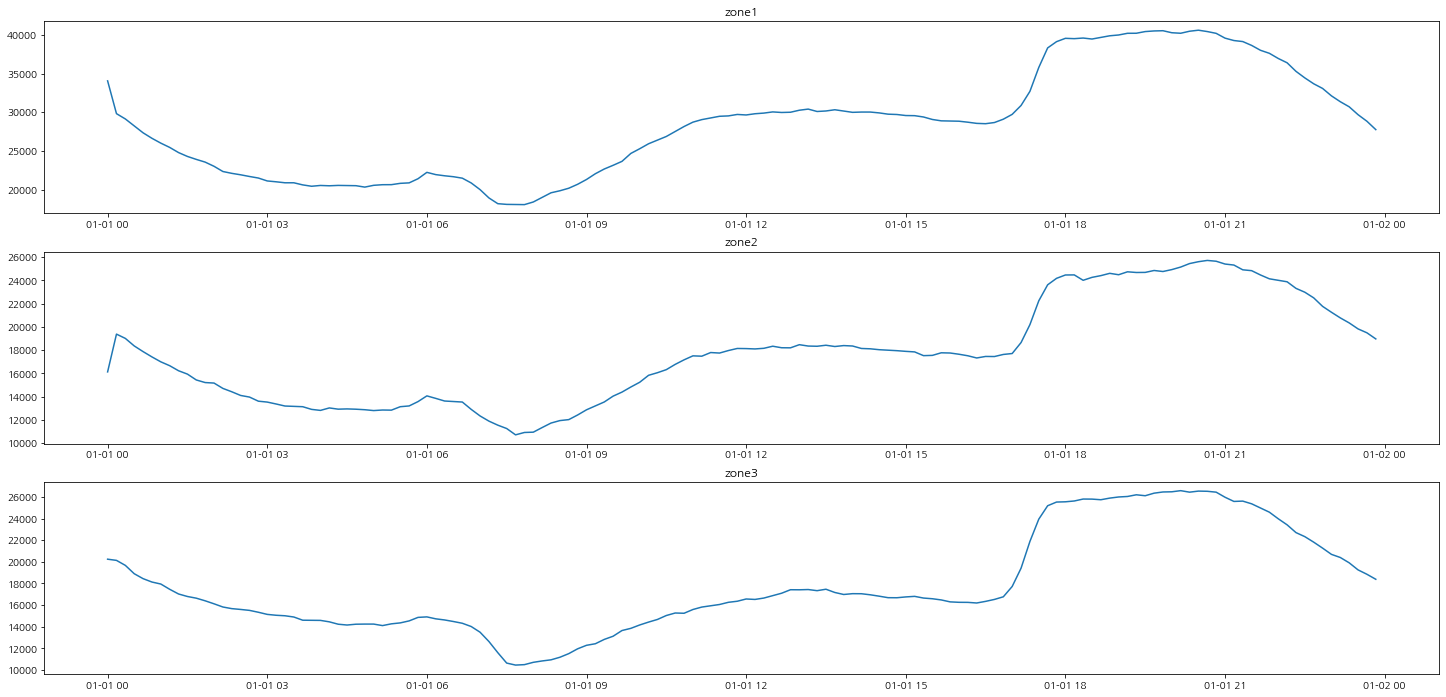

In [71]:
plt.figure(figsize=(25, 12))

plt.subplot(311)
plt.title('zone1')
plt.plot(zone1_1['DateTime'], zone1_1['zone1'], label='zone1')

plt.subplot(312)
plt.title('zone2')
plt.plot(zone1_1['DateTime'], zone1_1['zone2'], label='zone2')

plt.subplot(313)
plt.title('zone3')
plt.plot(zone1_1['DateTime'], zone1_1['zone3'], label='zone3')

plt.show()

## 상관관계 분석

In [72]:
powercomp.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


- 온도와 발전량 상관관계

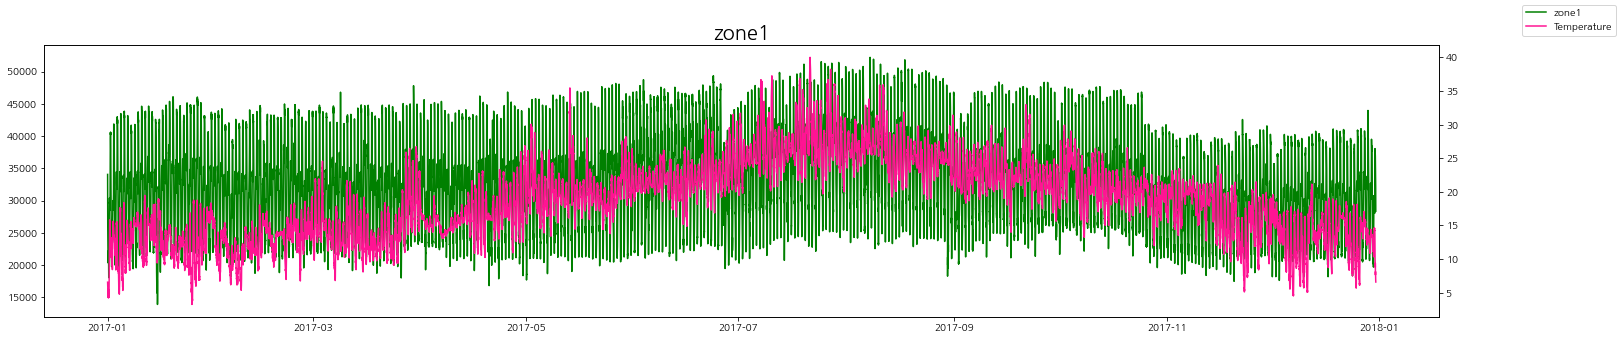

In [81]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['zone1'], color='green', label='zone1')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['Temperature'], color='deeppink', label='Temperature')

fig.legend()
plt.title('zone1', fontsize=20)
plt.gcf().set_size_inches(25, 5)
plt.show()

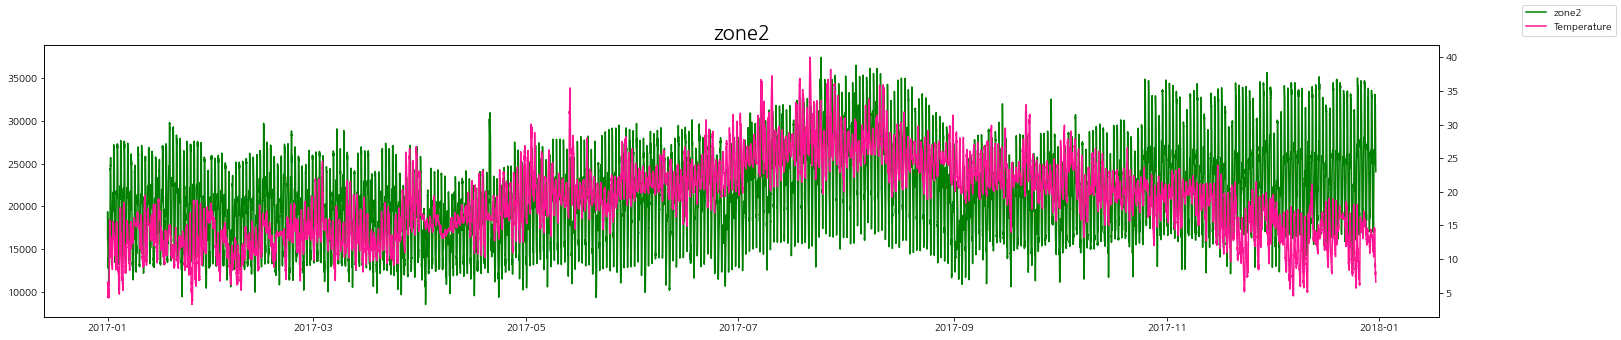

In [82]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['zone2'], color='green', label='zone2')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['Temperature'], color='deeppink', label='Temperature')

fig.legend()
plt.title('zone2', fontsize=20)
plt.gcf().set_size_inches(25, 5)
plt.show()

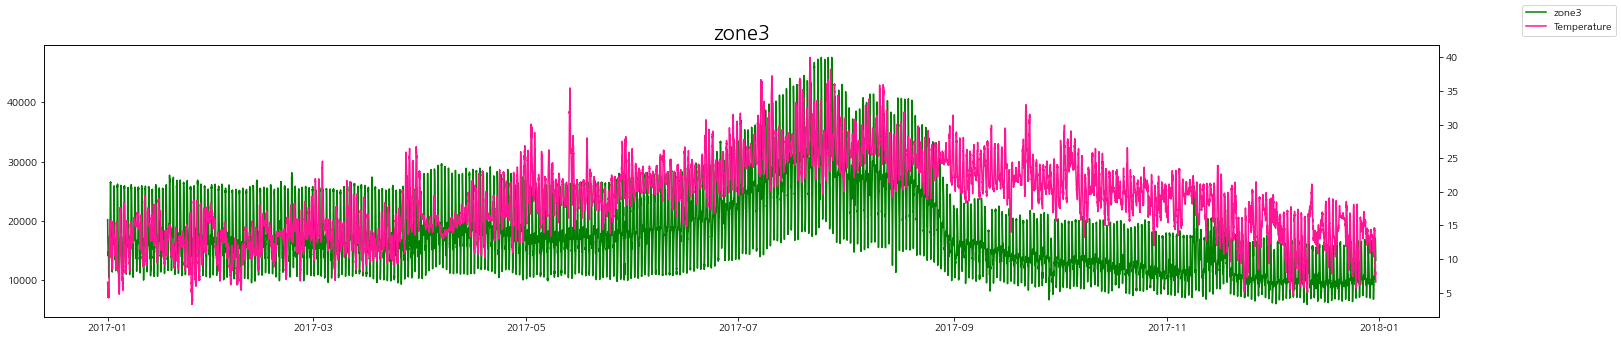

In [83]:
fig, ax = plt.subplots()
ax.plot(powercomp['DateTime'], powercomp['zone3'], color='green', label='zone3')

ax_1 = ax.twinx()
ax_1.plot(powercomp['DateTime'], powercomp['Temperature'], color='deeppink', label='Temperature')

fig.legend()
plt.title('zone3', fontsize=20)
plt.gcf().set_size_inches(25, 5)
plt.show()

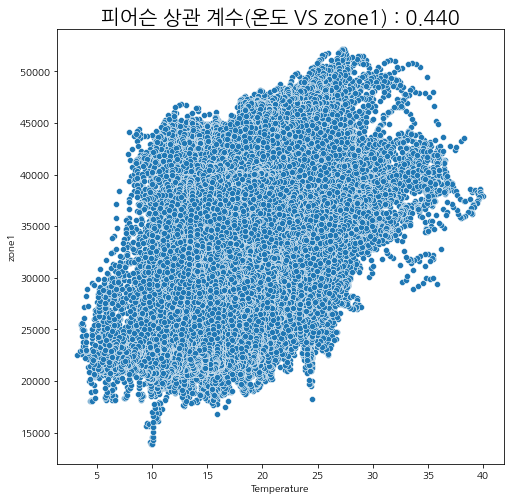

In [107]:
sns.scatterplot(x=powercomp['Temperature'], y=powercomp['zone1'])
plt.gcf().set_size_inches(8, 8)
plt.title('피어슨 상관 계수(온도 VS zone1) : ' + f"{stats.pearsonr(x=powercomp['Temperature'], y=powercomp['zone1'])[0]:.3f}", fontsize=20)
plt.show()

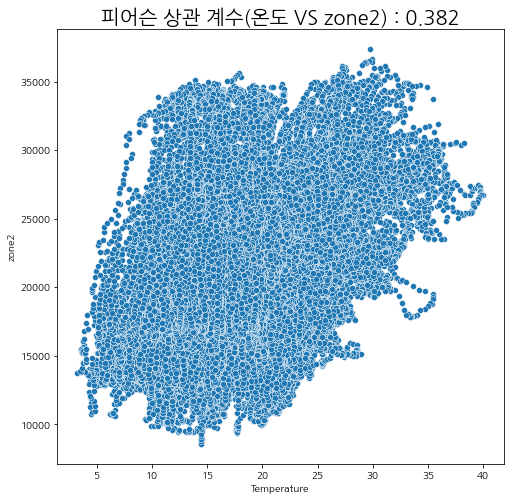

In [108]:
sns.scatterplot(x=powercomp['Temperature'], y=powercomp['zone2'])
plt.gcf().set_size_inches(8, 8)
plt.title('피어슨 상관 계수(온도 VS zone2) : ' + f"{stats.pearsonr(x=powercomp['Temperature'], y=powercomp['zone2'])[0]:.3f}", fontsize=20)
plt.show()

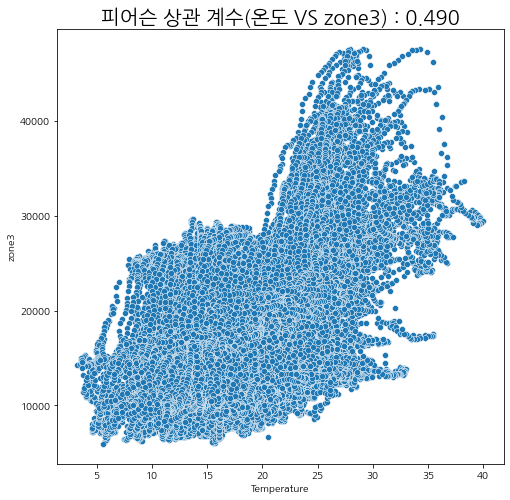

In [109]:
sns.scatterplot(x=powercomp['Temperature'], y=powercomp['zone3'])
plt.gcf().set_size_inches(8, 8)
plt.title('피어슨 상관 계수(온도 VS zone3) : ' + f"{stats.pearsonr(x=powercomp['Temperature'], y=powercomp['zone3'])[0]:.3f}", fontsize=20)
plt.show()